# Data Exploration


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chicago Crime Dataset Analysis

## Dataset Overview

This notebook explores the Chicago Crime Dataset, which contains reported incidents of crime in the city of Chicago. The data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.

## Data Dictionary

The dataset contains 22 columns with the following information:

| Column Name              | Description                                                                               | Data Type          |
| ------------------------ | ----------------------------------------------------------------------------------------- | ------------------ |
| **ID**                   | Unique identifier for the record                                                          | Number             |
| **Case Number**          | The Chicago Police Department RD Number (Records Division Number), unique to the incident | Text               |
| **Date**                 | Date when the incident occurred (sometimes an estimate)                                   | Floating Timestamp |
| **Block**                | Partially redacted address where the incident occurred                                    | Text               |
| **IUCR**                 | Illinois Uniform Crime Reporting code linked to Primary Type and Description              | Text               |
| **Primary Type**         | Primary description of the IUCR code                                                      | Text               |
| **Description**          | Secondary description of the IUCR code (subcategory)                                      | Text               |
| **Location Description** | Description of the location where the incident occurred                                   | Text               |
| **Arrest**               | Indicates whether an arrest was made                                                      | Checkbox           |
| **Domestic**             | Indicates whether the incident was domestic-related                                       | Checkbox           |
| **Beat**                 | The police beat where the incident occurred                                               | Text               |
| **District**             | The police district where the incident occurred                                           | Text               |
| **Ward**                 | The ward (City Council district) where the incident occurred                              | Number             |
| **Community Area**       | The community area where the incident occurred (Chicago has 77 areas)                     | Text               |
| **FBI Code**             | Crime classification based on FBI's National Incident-Based Reporting System              | Text               |
| **X Coordinate**         | X coordinate in State Plane Illinois East NAD 1983 projection                             | Number             |
| **Y Coordinate**         | Y coordinate in State Plane Illinois East NAD 1983 projection                             | Number             |
| **Year**                 | Year the incident occurred                                                                | Number             |
| **Updated On**           | Date and time the record was last updated                                                 | Floating Timestamp |
| **Latitude**             | Latitude of the incident location (partially redacted)                                    | Number             |
| **Longitude**            | Longitude of the incident location (partially redacted)                                   | Number             |
| **Location**             | Location formatted for geographic operations                                              | Location           |

## Important Notes:

- Location data (coordinates, latitude/longitude) is shifted from the actual location for privacy but remains on the same block
- A **Beat** is the smallest police geographic area with a dedicated police car
- Three to five beats make up a police sector
- Three sectors make up a police district
- Chicago has 22 police districts and 77 community areas
- The IUCR (Illinois Uniform Crime Reporting) codes provide standardized categories for crime types

## Analysis Goals

In this notebook, we'll explore:

1. Crime patterns across years
2. Crime patterns across months
3. Crime patterns showed on the Chicago map
4. Correlations between different factors
5. Crime patterns across different areas of Chicago
6. Temporal trends in crime rates
7. Relationships between crime types and locations
8. Predictive modeling to identify factors associated with different crime outcomes


In [ ]:
# import data
from google.colab import drive
drive.mount('/content/drive')

crimes = pd.read_csv("/content/drive/MyDrive/Crimes_-_2001_to_Present_20250227.csv")

In [ ]:
# first five rows of data

crimes.head()

ID Case Number                    Date                    Block  \
0  13311263    JG503434  07/29/2022 03:39:00 AM          023XX S TROY ST   
1  13053066    JG103252  01/03/2023 04:44:00 PM  039XX W WASHINGTON BLVD   
2  11227634    JB147599  08/26/2017 10:00:00 AM      001XX W RANDOLPH ST   
3  13203321    JG415333  09/06/2023 05:00:00 PM         002XX N Wells st   
4  13204489    JG416325  09/06/2023 11:00:00 AM           0000X E 8TH ST   

   IUCR                Primary Type                    Description  \
0  1582  OFFENSE INVOLVING CHILDREN              CHILD PORNOGRAPHY   
1  2017                   NARCOTICS  MANUFACTURE / DELIVER - CRACK   
2  0281         CRIM SEXUAL ASSAULT                 NON-AGGRAVATED   
3  1320             CRIMINAL DAMAGE                     TO VEHICLE   
4  0810                       THEFT                      OVER $500   

                     Location Description  Arrest  Domestic  ...  Ward  \
0                               RESIDENCE    True     False  ...  25.0   
1                                SIDEWALK    True     False  ...  28.0   
2                             HOTEL/MOTEL   False     False  ...  42.0   
3  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False  ...  42.0   
4  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False  ...   4.0   

   Community Area  FBI Code  X Coordinate Y Coordinate  Year  \
0            30.0        17           NaN          NaN  2022   
1            26.0        18           NaN          NaN  2023   
2            32.0        02           NaN          NaN  2017   
3            32.0        14     1174694.0    1901831.0  2023   
4            32.0        06     1176857.0    1896680.0  2023   

               Updated On   Latitude  Longitude                       Location  
0  04/18/2024 03:40:59 PM        NaN        NaN                            NaN  
1  01/20/2024 03:41:12 PM        NaN        NaN                            NaN  
2  02/11/2018 03:57:41 PM        NaN        NaN                            NaN  
3  11/04/2023 03:40:18 PM  41.886018 -87.633938  (41.886018055, -87.633937881)  
4  11/04/2023 03:40:18 PM  41.871835 -87.626151   (41.871834768, -87.62615082)  

[5 rows x 22 columns]

In [ ]:
# data information

crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8263506 entries, 0 to 8263505
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [ ]:
# summary of data

crimes.describe()

ID          Beat      District          Ward  Community Area  \
count  8.263506e+06  8.263506e+06  8.263459e+06  7.648679e+06    7.650053e+06   
mean   7.393911e+06  1.184315e+03  1.129806e+01  2.277966e+01    3.740383e+01   
std    3.712156e+06  7.036290e+02  6.961480e+00  1.385707e+01    2.154766e+01   
min    6.340000e+02  1.110000e+02  1.000000e+00  1.000000e+00    0.000000e+00   
25%    3.990257e+06  6.210000e+02  6.000000e+00  1.000000e+01    2.300000e+01   
50%    7.393106e+06  1.034000e+03  1.000000e+01  2.300000e+01    3.200000e+01   
75%    1.072528e+07  1.731000e+03  1.700000e+01  3.400000e+01    5.600000e+01   
max    1.375840e+07  2.535000e+03  3.100000e+01  5.000000e+01    7.700000e+01   

       X Coordinate  Y Coordinate          Year      Latitude     Longitude  
count  8.172018e+06  8.172018e+06  8.263506e+06  8.172018e+06  8.172018e+06  
mean   1.164636e+06  1.885888e+06  2.010736e+03  4.184247e+01 -8.767136e+01  
std    1.696433e+04  3.245024e+04  6.867552e+00  8.928239e-02  6.147081e-02  
min    0.000000e+00  0.000000e+00  2.001000e+03  3.661945e+01 -9.168657e+01  
25%    1.153044e+06  1.859185e+06  2.005000e+03  4.176889e+01 -8.771346e+01  
50%    1.166183e+06  1.890950e+06  2.010000e+03  4.185635e+01 -8.766566e+01  
75%    1.176391e+06  1.909397e+06  2.016000e+03  4.190706e+01 -8.762808e+01  
max    1.205119e+06  1.951622e+06  2.025000e+03  4.202291e+01 -8.752453e+01

In [ ]:
# missing data summary

crimes.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     14001
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614827
Community Area          613453
FBI Code                     0
X Coordinate             91488
Y Coordinate             91488
Year                         0
Updated On                   0
Latitude                 91488
Longitude                91488
Location                 91488
dtype: int64

In [ ]:
# group by year

yearInfo = crimes.groupby("Year").count()
print(yearInfo)

          ID  Case Number    Date   Block    IUCR  Primary Type  Description  \
Year                                                                           
2001  485931       485931  485931  485931  485931        485931       485931   
2002  486828       486828  486828  486828  486828        486828       486828   
2003  475991       475991  475991  475991  475991        475991       475991   
2004  469433       469433  469433  469433  469433        469433       469433   
2005  453778       453778  453778  453778  453778        453778       453778   
2006  448194       448194  448194  448194  448194        448194       448194   
2007  437099       437099  437099  437099  437099        437099       437099   
2008  427203       427203  427203  427203  427203        427203       427203   
2009  392852       392852  392852  392852  392852        392852       392852   
2010  370545       370545  370545  370545  370545        370545       370545   
2011  352025       352025  352025  35202

<ipython-input-9-98de436f1858>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


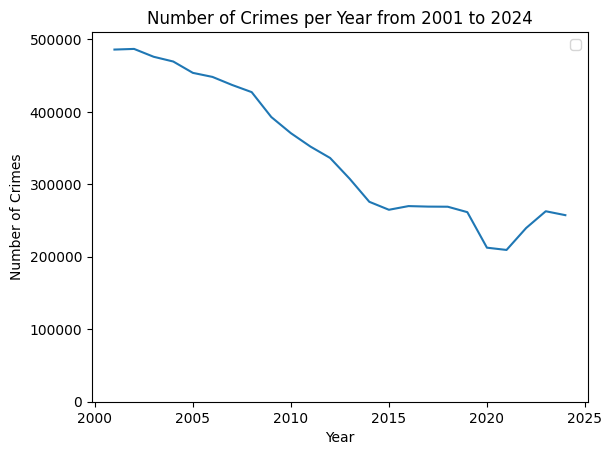

In [ ]:
# display relationship between the crime count and year from 2001 to 2024

plt.plot(yearInfo.index[:24], yearInfo["ID"][:24])
plt.ylim(0,510000)
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Number of Crimes per Year from 2001 to 2024")
plt.legend()
plt.savefig("crimes_per_year.pdf", format="pdf")
plt.show()

In [ ]:
# create month feature

crimes["Month"]=pd.DatetimeIndex(crimes["Date"]).month
crimes.head()

ID Case Number                    Date                    Block  \
0  13311263    JG503434  07/29/2022 03:39:00 AM          023XX S TROY ST   
1  13053066    JG103252  01/03/2023 04:44:00 PM  039XX W WASHINGTON BLVD   
2  11227634    JB147599  08/26/2017 10:00:00 AM      001XX W RANDOLPH ST   
3  13203321    JG415333  09/06/2023 05:00:00 PM         002XX N Wells st   
4  13204489    JG416325  09/06/2023 11:00:00 AM           0000X E 8TH ST   

   IUCR                Primary Type                    Description  \
0  1582  OFFENSE INVOLVING CHILDREN              CHILD PORNOGRAPHY   
1  2017                   NARCOTICS  MANUFACTURE / DELIVER - CRACK   
2  0281         CRIM SEXUAL ASSAULT                 NON-AGGRAVATED   
3  1320             CRIMINAL DAMAGE                     TO VEHICLE   
4  0810                       THEFT                      OVER $500   

                     Location Description  Arrest  Domestic  ...  \
0                               RESIDENCE    True     False  ...   
1                                SIDEWALK    True     False  ...   
2                             HOTEL/MOTEL   False     False  ...   
3  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False  ...   
4  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False  ...   

   Community Area  FBI Code  X Coordinate  Y Coordinate  Year  \
0            30.0        17           NaN           NaN  2022   
1            26.0        18           NaN           NaN  2023   
2            32.0        02           NaN           NaN  2017   
3            32.0        14     1174694.0     1901831.0  2023   
4            32.0        06     1176857.0     1896680.0  2023   

               Updated On   Latitude  Longitude  \
0  04/18/2024 03:40:59 PM        NaN        NaN   
1  01/20/2024 03:41:12 PM        NaN        NaN   
2  02/11/2018 03:57:41 PM        NaN        NaN   
3  11/04/2023 03:40:18 PM  41.886018 -87.633938   
4  11/04/2023 03:40:18 PM  41.871835 -87.626151   

                        Location  Month  
0                            NaN      7  
1                            NaN      1  
2                            NaN      8  
3  (41.886018055, -87.633937881)      9  
4   (41.871834768, -87.62615082)      9  

[5 rows x 23 columns]

In [ ]:
# group by year and month

monthInfo = crimes.groupby(["Year", "Month"]).count()
print(monthInfo)

               ID  Case Number   Date  Block   IUCR  Primary Type  \
Year Month                                                          
2001 1      38125        38125  38125  38125  38125         38125   
     2      33788        33788  33788  33788  33788         33788   
     3      40571        40571  40571  40571  40571         40571   
     4      40095        40095  40095  40095  40095         40095   
     5      41843        41843  41843  41843  41843         41843   
...           ...          ...    ...    ...    ...           ...   
2024 10     22288        22288  22288  22288  22288         22288   
     11     19535        19535  19535  19535  19535         19535   
     12     19286        19286  19286  19286  19286         19286   
2025 1      17904        17904  17904  17904  17904         17904   
     2       9267         9267   9267   9267   9267          9267   

            Description  Location Description  Arrest  Domestic  ...  \
Year Month                    

In [ ]:
# crime counts across months in 2004

monthInfo.loc[2004]

ID  Case Number   Date  Block   IUCR  Primary Type  Description  \
Month                                                                       
1      35113        35113  35113  35113  35113         35113        35113   
2      34071        34071  34071  34071  34071         34071        34071   
3      39858        39858  39858  39858  39858         39858        39858   
4      38271        38271  38271  38271  38271         38271        38271   
5      40783        40783  40783  40783  40783         40783        40783   
6      41136        41136  41136  41136  41136         41136        41136   
7      43243        43243  43243  43243  43243         43243        43243   
8      43047        43047  43047  43047  43047         43047        43047   
9      41216        41216  41216  41216  41216         41216        41216   
10     41529        41529  41529  41529  41529         41529        41529   
11     36843        36843  36843  36843  36843         36843        36843   
12     34323        34323  34323  34323  34323         34323        34323   

       Location Description  Arrest  Domestic  ...  District   Ward  \
Month                                          ...                    
1                     35111   35113     35113  ...     35113  35111   
2                     34071   34071     34071  ...     34071  34071   
3                     39857   39858     39858  ...     39858  39857   
4                     38271   38271     38271  ...     38271  38271   
5                     40781   40783     40783  ...     40783  40781   
6                     41135   41136     41136  ...     41135  41135   
7                     43241   43243     43243  ...     43243  43239   
8                     43045   43047     43047  ...     43047  43041   
9                     41212   41216     41216  ...     41216  41213   
10                    41526   41529     41529  ...     41528  41528   
11                    36842   36843     36843  ...     36843  36842   
12                    34323   34323     34323  ...     34323  34319   

       Community Area  FBI Code  X Coordinate  Y Coordinate  Updated On  \
Month                                                                     
1               35105     35113         34719         34719       35113   
2               34068     34071         33913         33913       34071   
3               39851     39858         39631         39631       39858   
4               38266     38271         37956         37956       38271   
5               40773     40783         40668         40668       40783   
6               41131     41136         40977         40977       41136   
7               43240     43243         43111         43111       43243   
8               43041     43047         42923         42923       43047   
9               41211     41216         41069         41069       41216   
10              41521     41529         41402         41402       41529   
11              36840     36843         36692         36692       36843   
12              34319     34323         34152         34152       34323   

       Latitude  Longitude  Location  
Month                                 
1         34719      34719     34719  
2         33913      33913     33913  
3         39631      39631     39631  
4         37956      37956     37956  
5         40668      40668     40668  
6         40977      40977     40977  
7         43111      43111     43111  
8         42923      42923     42923  
9         41069      41069     41069  
10        41402      41402     41402  
11        36692      36692     36692  
12        34152      34152     34152  

[12 rows x 21 columns]

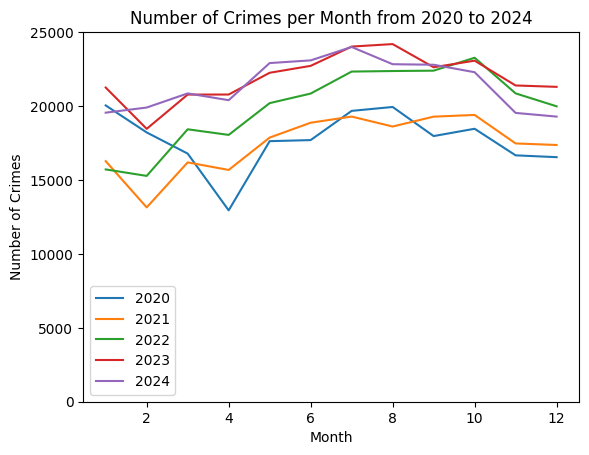

In [ ]:
# display relationship between the crime count and month every year between 2020 and 2024

for year in range(2020, 2025):
  plt.plot(np.array(range(1,13)), monthInfo.loc[year]["ID"], label=str(year))
plt.ylim(0,25000)
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.title("Number of Crimes per Month from 2020 to 2024")
plt.legend()
plt.savefig("crimes_per_month.pdf", format="pdf")
plt.show()

In [ ]:
# total counts from 2001 to 2024 across months

totalMonthInfo = crimes.groupby(["Month"]).count()
print(totalMonthInfo)

           ID  Case Number    Date   Block    IUCR  Primary Type  Description  \
Month                                                                           
1      660480       660480  660480  660480  660480        660480       660480   
2      577173       577173  577173  577173  577173        577173       577173   
3      671544       671544  671544  671544  671544        671544       671544   
4      668556       668556  668556  668556  668556        668556       668556   
5      728296       728296  728296  728296  728296        728296       728296   
6      727771       727771  727771  727771  727771        727771       727771   
7      765444       765444  765444  765444  765444        765444       765444   
8      757724       757724  757724  757724  757724        757724       757724   
9      713902       713902  713902  713902  713902        713902       713902   
10     721864       721864  721864  721864  721864        721864       721864   
11     650118       650118  

In [ ]:
# delete counts of 2025 because it's incomplete

for i in range(1,3):
  totalMonthInfo["ID"][i] = totalMonthInfo["ID"][i]-monthInfo.loc[2025,i]["ID"]
print(totalMonthInfo)

           ID  Case Number    Date   Block    IUCR  Primary Type  Description  \
Month                                                                           
1      642576       660480  660480  660480  660480        660480       660480   
2      567906       577173  577173  577173  577173        577173       577173   
3      671544       671544  671544  671544  671544        671544       671544   
4      668556       668556  668556  668556  668556        668556       668556   
5      728296       728296  728296  728296  728296        728296       728296   
6      727771       727771  727771  727771  727771        727771       727771   
7      765444       765444  765444  765444  765444        765444       765444   
8      757724       757724  757724  757724  757724        757724       757724   
9      713902       713902  713902  713902  713902        713902       713902   
10     721864       721864  721864  721864  721864        721864       721864   
11     650118       650118  

<ipython-input-54-b0e189bacb2a>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  totalMonthInfo["ID"][i] = totalMonthInfo["ID"][i]-monthInfo.loc[2025,i]["ID"]
<ipython-input-54-b0e189bacb2a>:2: FutureWarning: ChainedAssignmentError: behaviou

<ipython-input-55-230a176c014c>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


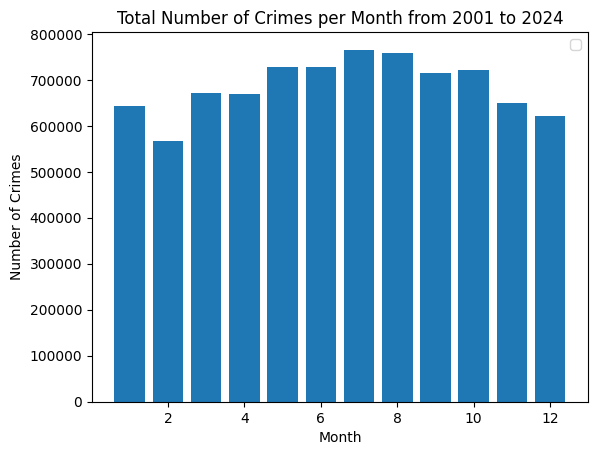

In [ ]:
# display relationship between the total crime count from 2001 to 2024 and month

plt.bar(np.array(range(1,13)), totalMonthInfo["ID"])
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.title("Total Number of Crimes per Month from 2001 to 2024")
plt.legend()
plt.savefig("total_crimes_per_month.pdf", format="pdf")
plt.show()
plt.bar(np.array(range(1,13)), totalMonthInfo["ID"])
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.title("Total Number of Crimes per Month from 2001 to 2024")
plt.legend()
plt.savefig("total_crimes_per_month.pdf", format="pdf")
plt.show()

In [ ]:
# group by district and year

crimes["District"].fillna(31.0, inplace=True)
crimes["District"] = crimes["District"].apply(int)
totalDistInfo = crimes.groupby(["District"]).count()["ID"]
distInfo = crimes.groupby(["Year", "District"]).count()["ID"]
print(totalDistInfo)

<ipython-input-76-694e3e93e33f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crimes["District"].fillna(31.0, inplace=True)


District
1     341555
2     392998
3     418867
4     468018
5     364102
6     482988
7     470104
8     554784
9     401511
10    355202
11    525843
12    414955
14    318907
15    349553
16    277700
17    239249
18    373942
19    375165
20    147977
21         4
22    269910
24    251842
25    468014
31       316
Name: ID, dtype: int64


In [ ]:
# updated district numbers

distInfo.loc[2025].index.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18,
       19, 20, 22, 24, 25, 31])

In [ ]:
# delete counts across districts of 2025 because it's incomplete

for d in distInfo.loc[2025].index.values:
  totalDistInfo[d] = totalDistInfo[d]-distInfo[2025][d]
print(totalDistInfo)

District
1     340041
2     391534
3     417479
4     466567
5     362939
6     481395
7     468970
8     552934
9     400364
10    354108
11    524207
12    413432
14    318048
15    348567
16    276835
17    238380
18    372571
19    373794
20    147388
21         4
22    269022
24    250879
25    466565
31       312
Name: ID, dtype: int64


In [ ]:
import geopandas as gpd
import folium

# Load Chicago police districts GeoJSON
districts = pd.read_csv("/content/drive/MyDrive/PoliceDistrictDec2012_20250227.csv")

districts.head()

the_geom DIST_LABEL  DIST_NUM
0  MULTIPOLYGON (((-87.71067089391354 41.99736565...       17TH        17
1  MULTIPOLYGON (((-87.66029423572358 41.99091633...       20TH        20
2  MULTIPOLYGON (((-87.82817787271652 41.98384222...       31ST        31
3  MULTIPOLYGON (((-87.83365455160555 41.97535481...       31ST        31
4  MULTIPOLYGON (((-87.64491798568677 41.96972709...       19TH        19

In [ ]:
# district data information

districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   the_geom    25 non-null     object
 1   DIST_LABEL  25 non-null     object
 2   DIST_NUM    25 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 732.0+ bytes


In [ ]:
from shapely import wkt

districts["the_geom"] = districts["the_geom"].apply(wkt.loads)

gdf = gpd.GeoDataFrame(districts, geometry="the_geom", crs="EPSG:4326")

gdf.head()

the_geom DIST_LABEL  DIST_NUM
0  MULTIPOLYGON (((-87.71067 41.99737, -87.71067 ...       17TH        17
1  MULTIPOLYGON (((-87.66029 41.99092, -87.66029 ...       20TH        20
2  MULTIPOLYGON (((-87.82818 41.98384, -87.82816 ...       31ST        31
3  MULTIPOLYGON (((-87.83365 41.97535, -87.83366 ...       31ST        31
4  MULTIPOLYGON (((-87.64492 41.96973, -87.64431 ...       19TH        19

In [ ]:
# display the total crime count from 2001 to 2024 mapped on chicago

total_count_districts = districts.copy()

total_count_districts["total_count"] = total_count_districts["DIST_NUM"].apply(lambda x: totalDistInfo.loc[x])

# Create a folium map
m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

folium.Choropleth(
    geo_data=gdf,
    name="Total Crime Count from 2001 to 2024",
    data=total_count_districts,
    columns=["DIST_LABEL", "total_count"],
    key_on="feature.properties.DIST_LABEL",
    fill_color="Reds",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Crime Count by Police District",
).add_to(m)

# Show map
m.save("chicago_crime_map_total.html")
m


In [ ]:
# delete crime count data of 2025 because it's incomplete

year_count_districts = districts.copy()

for i in range(2022,2025):
  year_count_districts["total_count_"+str(i)] = year_count_districts["DIST_NUM"].apply(lambda x: distInfo.loc[i,x])
print(year_count_districts.head())

                                            the_geom DIST_LABEL  DIST_NUM  \
0  MULTIPOLYGON (((-87.71067089391354 41.99736565...       17TH        17   
1  MULTIPOLYGON (((-87.66029423572358 41.99091633...       20TH        20   
2  MULTIPOLYGON (((-87.82817787271652 41.98384222...       31ST        31   
3  MULTIPOLYGON (((-87.83365455160555 41.97535481...       31ST        31   
4  MULTIPOLYGON (((-87.64491798568677 41.96972709...       19TH        19   

   total_count_2022  total_count_2023  total_count_2024  
0              7014              7854              7926  
1              4979              5586              5639  
2                15                15                13  
3                15                15                13  
4             12305             13729             14012  


In [ ]:
# display the crime count in different districts of 2022 mapped on chicago

# Create a folium map
m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

folium.Choropleth(
    geo_data=gdf,
    name="Total Crime Count in 2022",
    data=year_count_districts,
    columns=["DIST_LABEL", "total_count_2022"],
    key_on="feature.properties.DIST_LABEL",
    fill_color="Reds",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Crime Count by Police District",
).add_to(m)

# Show map
m.save("chicago_crime_map_2022.html")
m


In [ ]:
# display the crime count in different districts of 2023 mapped on chicago

# Create a folium map
m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

folium.Choropleth(
    geo_data=gdf,
    name="Total Crime Count in 2023",
    data=year_count_districts,
    columns=["DIST_LABEL", "total_count_2023"],
    key_on="feature.properties.DIST_LABEL",
    fill_color="Reds",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Crime Count by Police District",
).add_to(m)

# Show map
m.save("chicago_crime_map_2023.html")
m


In [ ]:
# display the crime count in different districts of 2024 mapped on chicago

# Create a folium map
m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

folium.Choropleth(
    geo_data=gdf,
    name="Total Crime Count in 2024",
    data=year_count_districts,
    columns=["DIST_LABEL", "total_count_2024"],
    key_on="feature.properties.DIST_LABEL",
    fill_color="Reds",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Crime Count by Police District",
).add_to(m)

# Show map
m.save("chicago_crime_map_2024.html")
m


In [ ]:
# delete "ID" feature because it's meaningless in the analysis

del crimes["ID"]

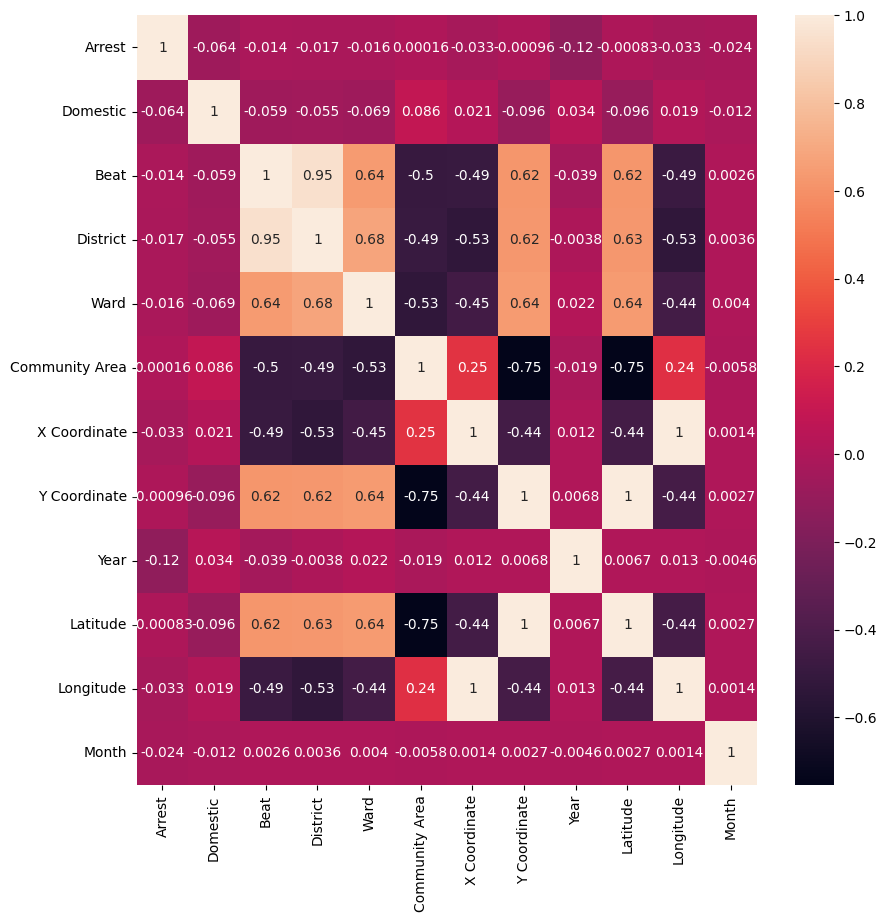

In [ ]:
# display the correlation between different factors

plt.figure(figsize=(10,10))
sns.heatmap(crimes.corr(numeric_only=True), annot=True)
plt.savefig("correlation.pdf", format="pdf")
plt.show()

In [ ]:
# import training data
data_path = "data/"
df_train = pd.read_csv(f"{data_path}classification_train_data.csv")
df_test = pd.read_csv(f"{data_path}classification_test_data.csv")
df_train.drop(
    ["Date", "Location", "X Coordinate", "Y Coordinate"], axis=1, inplace=True
)
df_test.drop(["Date", "Location", "X Coordinate", "Y Coordinate"], axis=1, inplace=True)

In [ ]:
df_train.head()

ID Case Number                Block  IUCR         Primary Type  \
0  13163389    JG368090   034XX W MELROSE ST  0910  MOTOR VEHICLE THEFT   
1  12485621    JE377297  036XX N CENTRAL AVE  0560              ASSAULT   
2  12466477    JE354006      030XX W 60TH ST  2825        OTHER OFFENSE   
3  12906925    JF491648     014XX S STATE ST  2826        OTHER OFFENSE   
4  12438167    JE319518    004XX S MORGAN ST  0620             BURGLARY   

                      Description Location Description  Arrest  Domestic  \
0                      AUTOMOBILE               STREET   False     False   
1                          SIMPLE                Other   False     False   
2         HARASSMENT BY TELEPHONE            RESIDENCE   False      True   
3  HARASSMENT BY ELECTRONIC MEANS            APARTMENT   False     False   
4                  UNLAWFUL ENTRY                Other   False     False   

   Beat  ...  Month  Day  Hour WeekDay  IsWeekday   Location Group  \
0  1732  ...      8    3    12       3       True   STREET_OUTDOOR   
1  1633  ...      9   17    14       4       True  OFFICE_BUSINESS   
2   823  ...      8   25    16       2       True      RESIDENTIAL   
3   131  ...      5   15     9       6      False      RESIDENTIAL   
4  1232  ...      7   30     8       4       True  OFFICE_BUSINESS   

            lat_bin             lon_bin  TimeCategory  Season  
0  (41.939, 41.947]  (-87.716, -87.707]       Morning  Summer  
1  (41.947, 41.955]  (-87.774, -87.765]     Afternoon  Summer  
2  (41.781, 41.788]  (-87.707, -87.699]     Afternoon  Summer  
3  (41.856, 41.864]  (-87.632, -87.624]       Morning  Spring  
4  (41.871, 41.879]  (-87.657, -87.649]       Morning  Summer  

[5 rows x 28 columns]

In [ ]:
df_train.describe()

ID           Beat       District           Ward  \
count  2.000000e+05  200000.000000  200000.000000  200000.000000   
mean   1.276376e+07    1153.065150      11.301515      23.168160   
std    7.902234e+05     707.618674       7.072775      14.042908   
min    2.570500e+04     111.000000       1.000000       1.000000   
25%    1.253600e+07     533.000000       5.000000       9.000000   
50%    1.280971e+07    1031.000000      10.000000      24.000000   
75%    1.307124e+07    1731.000000      17.000000      34.000000   
max    1.369768e+07    2535.000000      31.000000      50.000000   

       Community Area           Year       Latitude      Longitude  \
count   200000.000000  200000.000000  200000.000000  200000.000000   
mean        36.563325    2022.082460      41.844802     -87.668837   
std         21.567460       0.810305       0.087535       0.059693   
min          1.000000    2021.000000      41.644590     -87.939733   
25%         22.000000    2021.000000      41.768480     -87.710746   
50%         32.000000    2022.000000      41.861711     -87.662229   
75%         53.000000    2023.000000      41.908918     -87.626649   
max         77.000000    2023.000000      42.022548     -87.524532   

              Month            Day          Hour        WeekDay  
count  200000.00000  200000.000000  200000.00000  200000.000000  
mean        6.72284      15.689560      12.47187       3.022995  
std         3.35780       8.851052       6.92821       1.996944  
min         1.00000       1.000000       0.00000       0.000000  
25%         4.00000       8.000000       8.00000       1.000000  
50%         7.00000      16.000000      13.00000       3.000000  
75%        10.00000      23.000000      18.00000       5.000000  
max        12.00000      31.000000      23.00000       6.000000

In [ ]:
nunique_df = pd.DataFrame(
    {
        "Column": df_train.columns,
        "Unique Values": df_train.nunique().values,
        "Type": df_train.dtypes.values,
        "Is Null": df_train.isnull().sum().values,
    }
)
nunique_df.sort_values("Unique Values", ascending=False)

Column  Unique Values     Type  Is Null
0                     ID         200000    int64        0
1            Case Number         199988   object        0
16              Latitude         109993  float64        0
17             Longitude         109992  float64        0
2                  Block          27252   object        0
15            Updated On           1785   object        0
3                   IUCR            307   object        0
5            Description            285   object        0
9                   Beat            275    int64        0
12        Community Area             77  float64        0
11                  Ward             50  float64        0
25               lon_bin             50   object        0
24               lat_bin             50   object        0
4           Primary Type             31   object        0
19                   Day             31    int64        0
13              FBI Code             26   object        0
20                  Hour             24    int64        0
10              District             23  float64        0
23        Location Group             19   object        0
6   Location Description             17   object        0
18                 Month             12    int64        0
21               WeekDay              7    int64        0
26          TimeCategory              4   object        0
27                Season              4   object        0
14                  Year              3    int64        0
22             IsWeekday              2     bool        0
8               Domestic              2     bool        0
7                 Arrest              2     bool        0

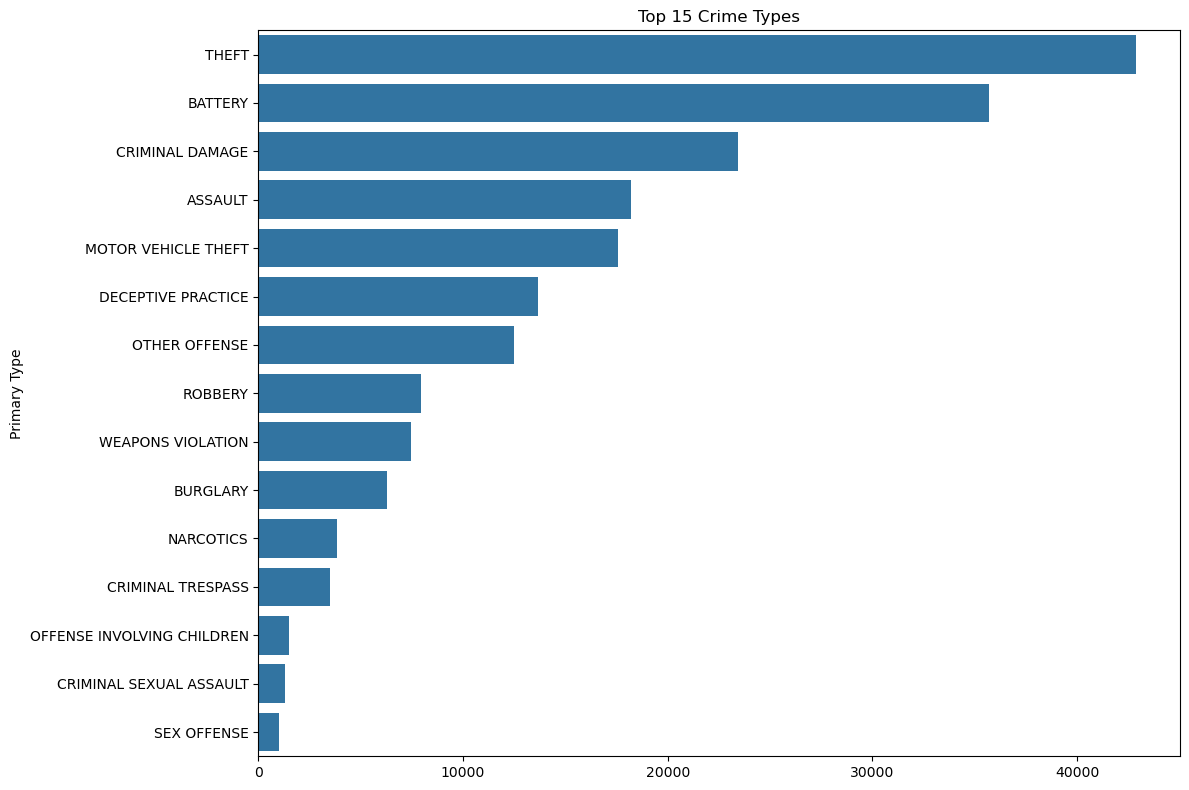

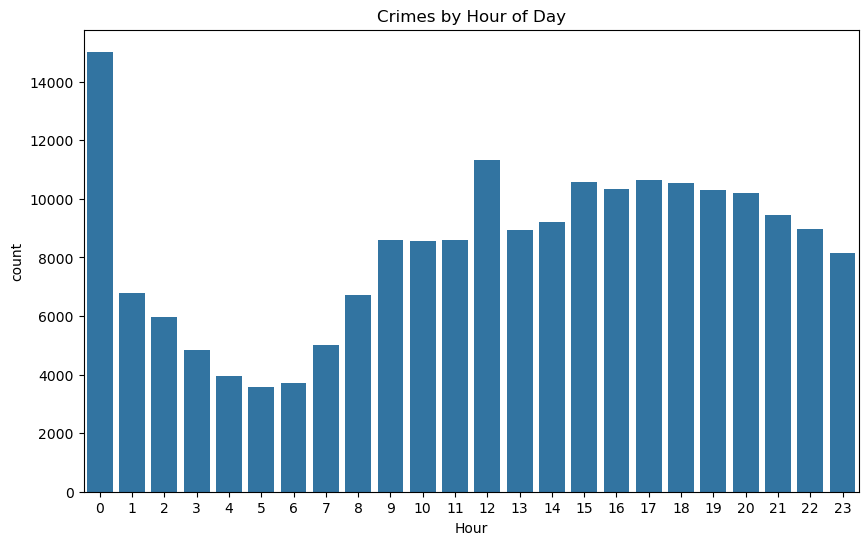

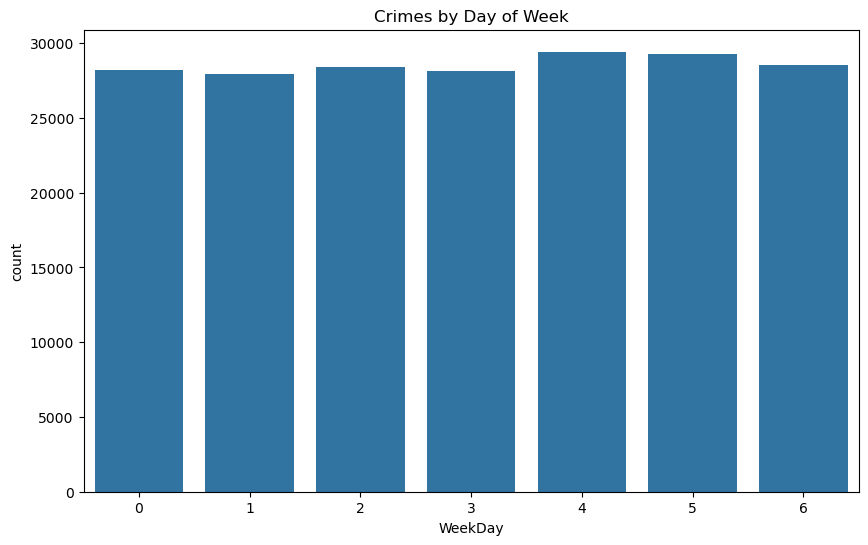

In [ ]:
# Visualize crime distribution by type
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
crime_counts = df_train["Primary Type"].value_counts().head(15)
sns.barplot(x=crime_counts.values, y=crime_counts.index)
plt.title("Top 15 Crime Types")
plt.tight_layout()
plt.show()

# Time-based patterns
plt.figure(figsize=(10, 6))
sns.countplot(x="Hour", data=df_train)
plt.title("Crimes by Hour of Day")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x="WeekDay", data=df_train)
plt.title("Crimes by Day of Week")
plt.show()

## Arrest Rates by Crime Type


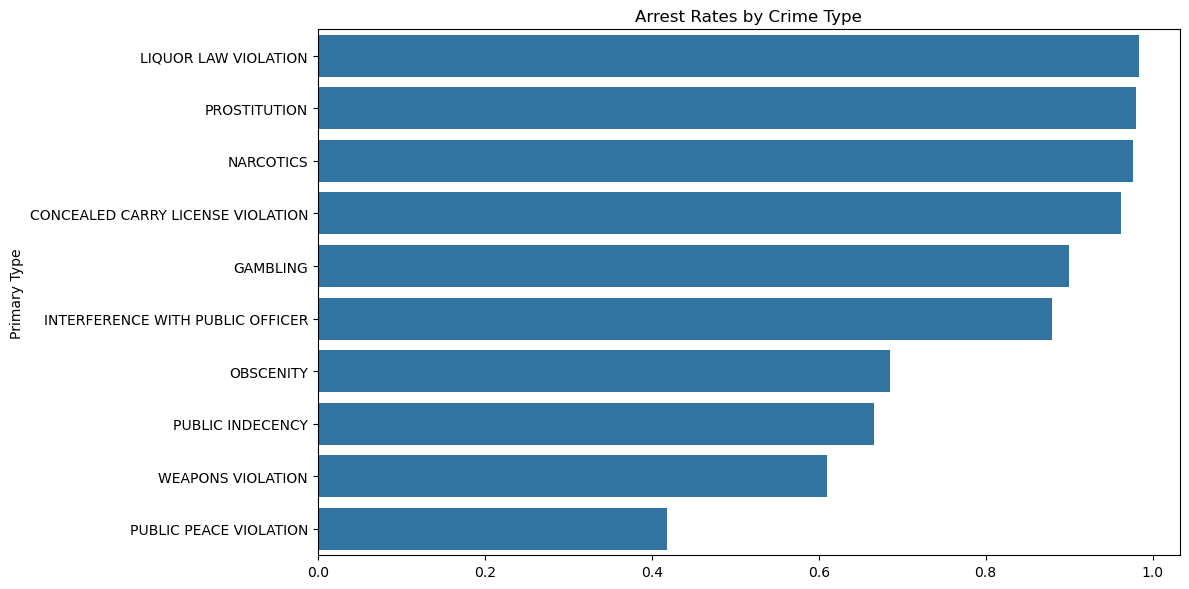

In [ ]:
plt.figure(figsize=(12, 6))
arrest_rates = (
    df_train.groupby("Primary Type")["Arrest"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
sns.barplot(x=arrest_rates.values, y=arrest_rates.index)
plt.title("Arrest Rates by Crime Type")
plt.tight_layout()
plt.show()

# Arrest Rates by Location


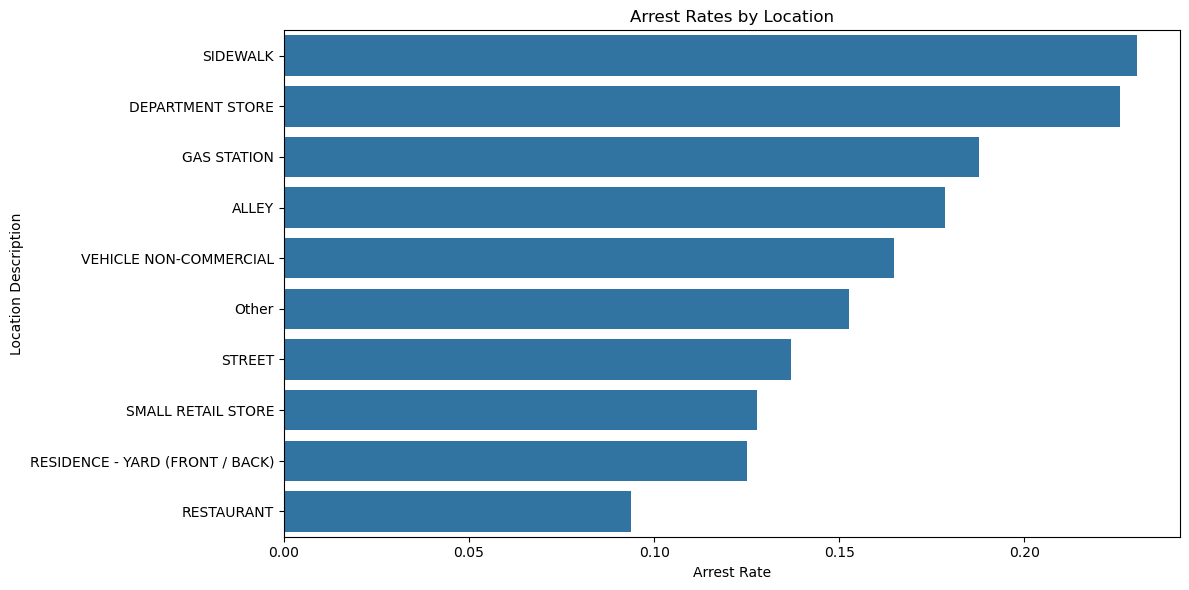

In [ ]:
plt.figure(figsize=(12, 6))
location_arrest = (
    df_train.groupby("Location Description")["Arrest"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
sns.barplot(x=location_arrest.values, y=location_arrest.index)
plt.title("Arrest Rates by Location")
plt.xlabel("Arrest Rate")
plt.tight_layout()
plt.show()

## Arrest Rates by District


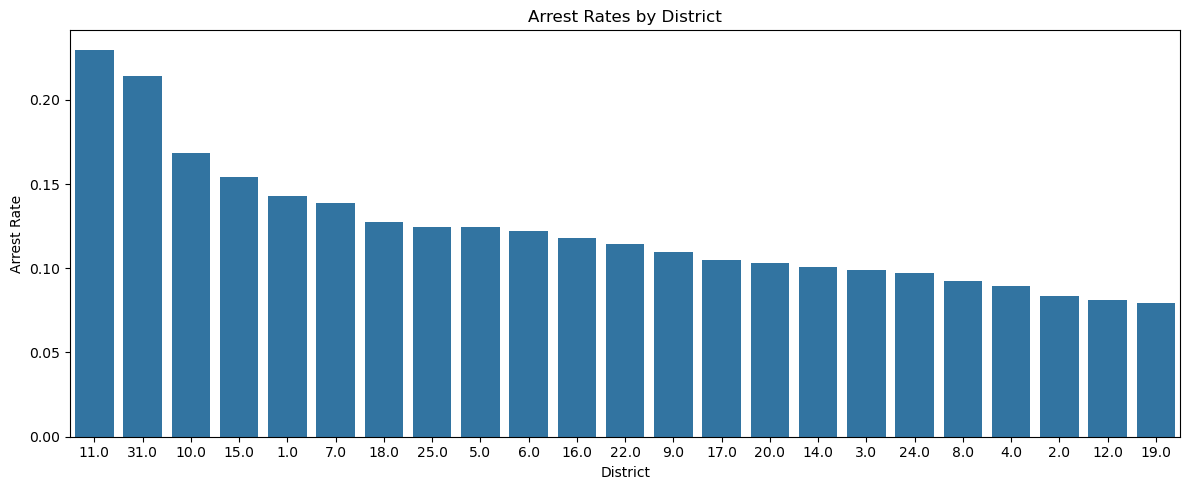

In [ ]:
plt.figure(figsize=(12, 5))
district_arrest = (
    df_train.groupby("District")["Arrest"].mean().sort_values(ascending=False)
)
sns.barplot(x=district_arrest.index.astype(str), y=district_arrest.values)
plt.title("Arrest Rates by District")
plt.xlabel("District")
plt.ylabel("Arrest Rate")
plt.tight_layout()
plt.show()

## Crime Type by Top Location Groups


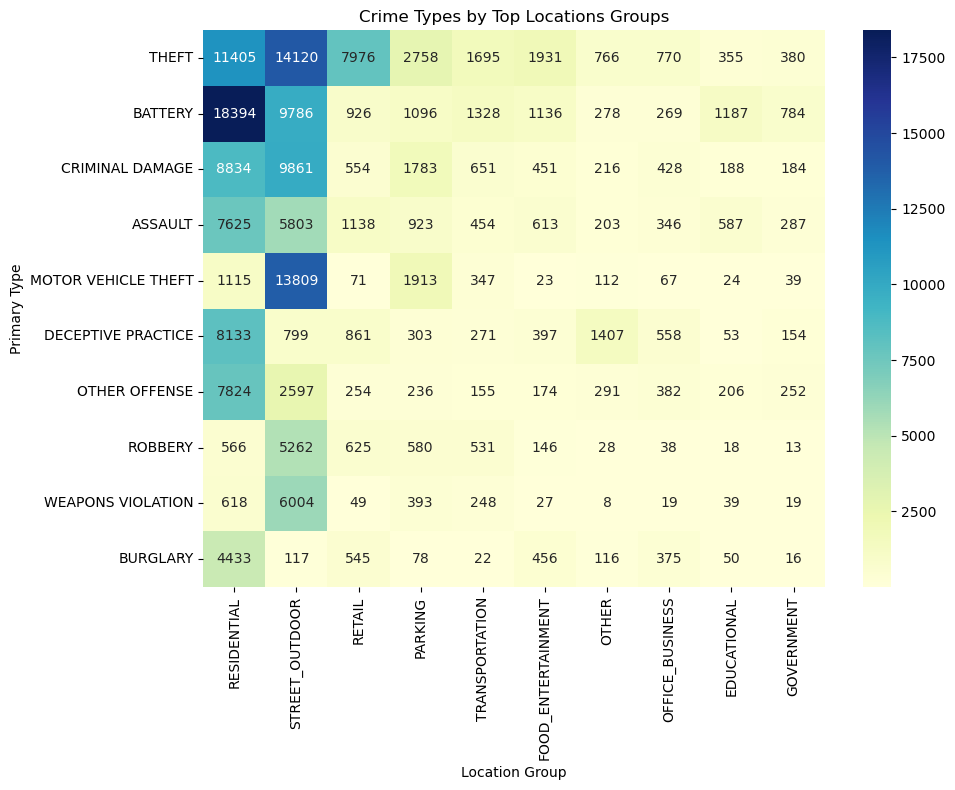

In [ ]:
plt.figure(figsize=(10, 8))
top_crimes = df_train["Primary Type"].value_counts().head(10).index
top_locations = df_train["Location Group"].value_counts().head(10).index
crime_by_location = pd.crosstab(df_train["Primary Type"], df_train["Location Group"])[
    top_locations
].loc[top_crimes]
sns.heatmap(crime_by_location, annot=True, cmap="YlGnBu", fmt="g")
plt.title("Crime Types by Top Locations Groups")
plt.tight_layout()
plt.show()

## Crime Counts By Season


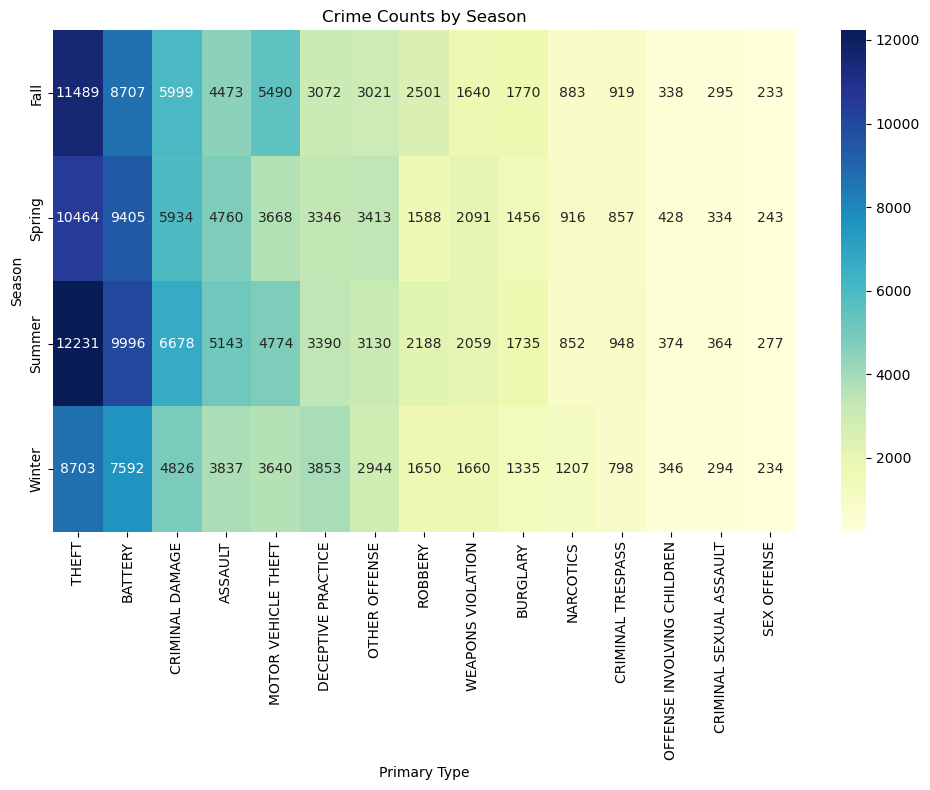

In [ ]:
plt.figure(figsize=(10, 8))
season_crime = pd.crosstab(df_train["Season"], df_train["Primary Type"])
top_crimes = df_train["Primary Type"].value_counts().head(15).index
season_crime = season_crime[top_crimes]
sns.heatmap(season_crime, annot=True, cmap="YlGnBu", fmt="g")
plt.title("Crime Counts by Season")
plt.tight_layout()
plt.show()

## Correlation Matrix


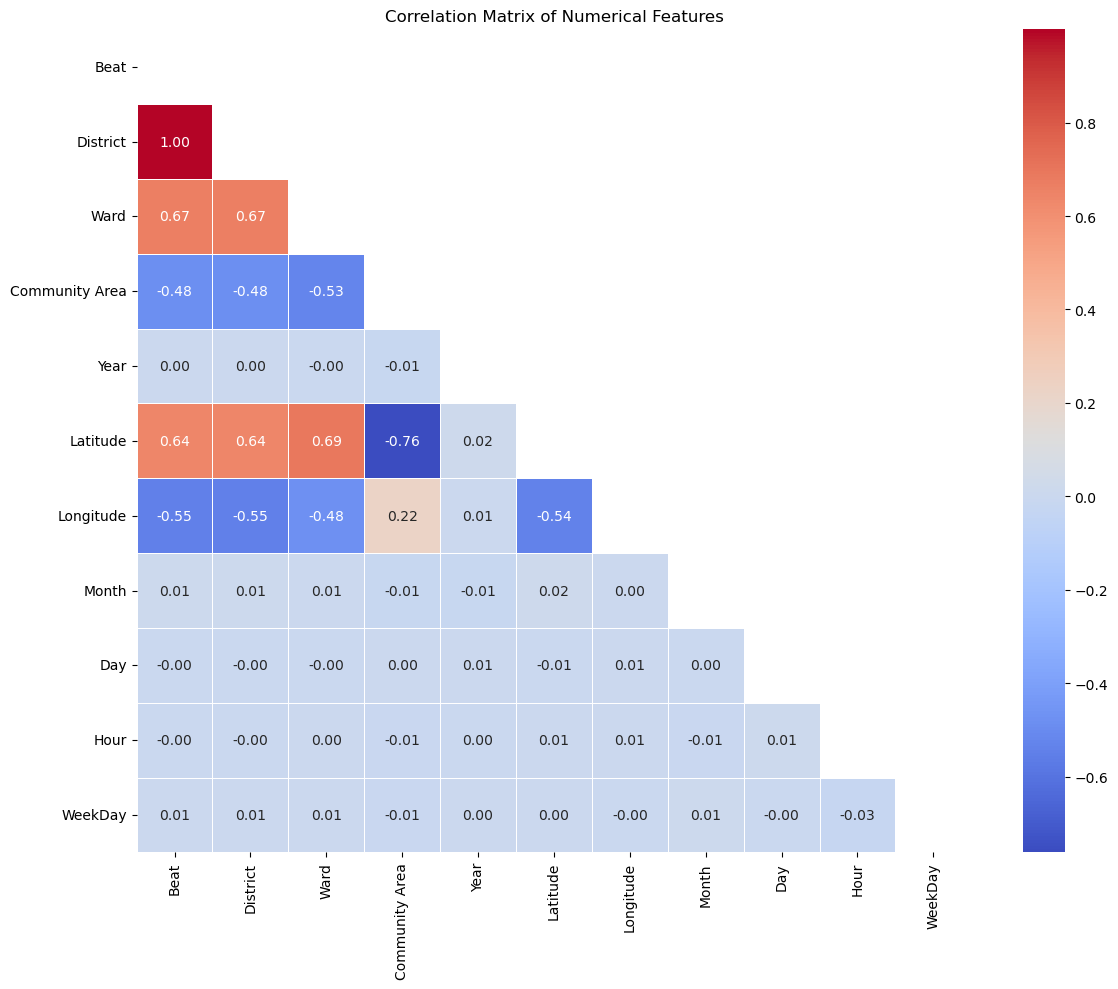

In [ ]:
plt.figure(figsize=(12, 10))
numerical_cols = df_train.select_dtypes(include=["number"]).columns.drop(["ID"])
corr_matrix = df_train[numerical_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix, mask=mask, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f"
)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

## PCA


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

['Location Group', 'lat_bin', 'lon_bin', 'TimeCategory', 'District', 'Season']
(200000, 144)


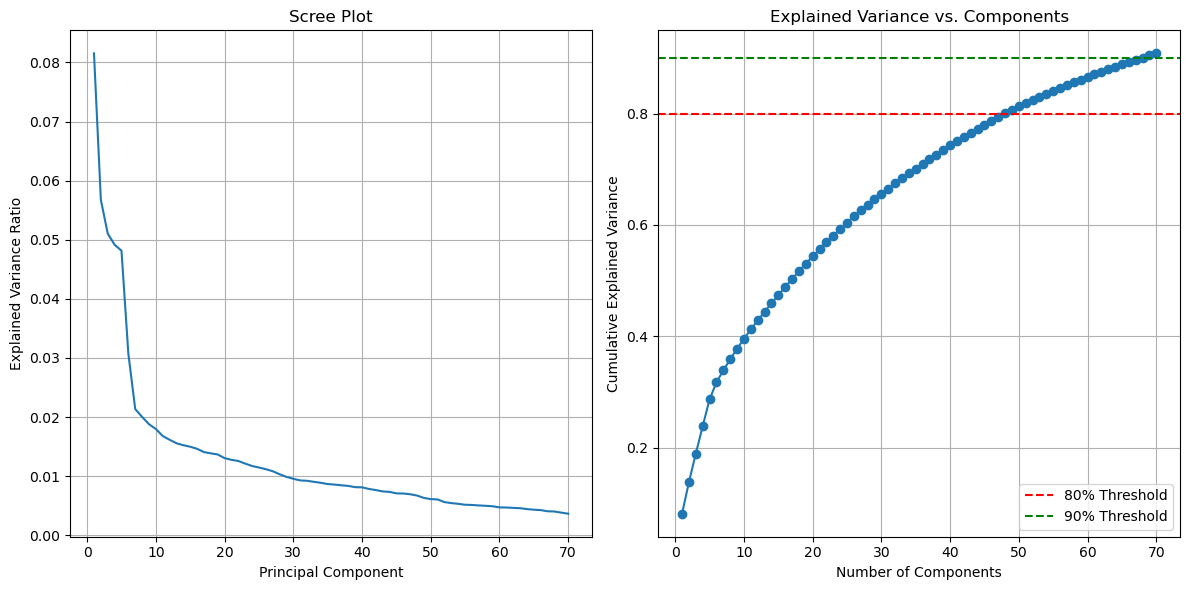

In [ ]:
# Create scree plot for PCA component selection
plt.figure(figsize=(12, 6))
# First encode categorical variables
categorical_cols = [
    "Location Group",
    "lat_bin",
    "lon_bin",
    "TimeCategory",
    "District",
    "Season",
]
print(categorical_cols)
encoder = OneHotEncoder(drop="first")
encoded_cats = encoder.fit_transform(df_train[categorical_cols])
print(encoded_cats.shape)
# Then perform PCA
pca = PCA(n_components=70)  # Choose appropriate number of components
pca_result = pca.fit_transform(encoded_cats)
# Plot the explained variance of each individual component
plt.subplot(1, 2, 1)
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_
)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid(True)

# Plot the cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    np.cumsum(pca.explained_variance_ratio_),
    marker="o",
)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Components")
plt.axhline(y=0.8, color="r", linestyle="--", label="80% Threshold")
plt.axhline(y=0.9, color="g", linestyle="--", label="90% Threshold")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()